# Идентификация частотного скана сигнала релаксации, состоящего из трёх экспоненциальных составляющих, моноэкспоненциальной моделью

In [1]:
from joblib import Parallel, delayed

import matplotlib.pyplot as plt

import numpy as np
from os import listdir
import pandas as pd
import tensorflow as tf

%matplotlib inline

from fsmodels import FrequencyScan, MultiExpFrequencyScan

In [2]:
n_exps = 3

n_scans = 31

central_time_constant_power = -2.0

frequency_powers = np.linspace(0, 3.5, 100)

dev = 1 + np.linspace(-0.5, 0.5, n_exps) * np.linspace(0, 1, n_scans).reshape(-1,1)

time_constant_powers = central_time_constant_power * dev

amplitudes = np.ones_like(time_constant_powers)

In [3]:
initial_model = FrequencyScan(fit_p_coef = True,
                              learning_rate = 0.2,
                              n_iters = 1000,
                              stop_val = 10**-10,
                              verbose = True,
                              tf_in_out = False)

In [4]:
def spectr_identification(time_constant_powers, 
                          amplitudes,
                          frequency_powers
                         ):
    
    exps_params = np.append(time_constant_powers.reshape(-1,1), amplitudes.reshape(-1,1), axis=1)

    model = MultiExpFrequencyScan(n_exps=time_constant_powers.shape[0],
                                   exps_params=exps_params)

    dlts = model(frequency_powers)
        
    model = FrequencyScan(time_constant_power=-1.25,
                          fit_p_coef = True,
                          learning_rate = 0.2,
                          n_iters = 1000,
                          stop_val = 10**-10,
                          verbose = True,
                          tf_in_out = False)
    
    fit_results = model.fit(frequency_powers, dlts)
    
    return fit_results.iloc[[-1], :]

In [5]:
n_jobs = -1

results = Parallel(n_jobs=n_jobs
                  )(delayed(spectr_identification
                           )(time_constant_power,amplitude,frequency_powers
                            ) for time_constant_power, amplitude in zip(time_constant_powers, amplitudes))

results = pd.concat(results, ignore_index=True)
results[['tc_0', 'tc_1', 'tc_2']] = 10 ** time_constant_powers
results[['amp_0', 'amp_1', 'amp_2']] = amplitudes

results.to_csv('../models/3-exp-clear/models_parameters.csv', index=False)

results

,amplitude,time_constant_power,p_coef,loss,tc_0,tc_1,tc_2,amp_0,amp_1,amp_2
0,3.000065,-2.0,1.000037,0.0,0.010000,0.01,0.010000,1.0,1.0,1.0
1,2.9958,-2.000003,0.997369,0.0,0.010798,0.01,0.009261,1.0,1.0,1.0
2,2.983085,-2.000008,0.989434,0.000007,0.011659,0.01,0.008577,1.0,1.0,1.0
3,2.962168,-1.999999,0.976442,0.000037,0.012589,0.01,0.007943,1.0,1.0,1.0
4,2.933441,-1.999953,0.958724,0.000114,0.013594,0.01,0.007356,1.0,1.0,1.0
5,2.897431,-1.999837,0.936716,0.000269,0.014678,0.01,0.006813,1.0,1.0,1.0
6,2.854769,-1.999611,0.910929,0.000535,0.015849,0.01,0.006310,1.0,1.0,1.0
7,2.806167,-1.999227,0.881925,0.000943,0.017113,0.01,0.005843,1.0,1.0,1.0
8,2.75238,-1.998632,0.85028,0.001521,0.018478,0.01,0.005412,1.0,1.0,1.0
9,2.69419,-1.997773,0.816569,0.002287,0.019953,0.01,0.005012,1.0,1.0,1.0


In [6]:
def plot_model(data, initial_dlts, model, freq_ix=0, dlts_ix=1, alpha_ex=0.3):
    fig, ax = plt.subplots(1, 1, figsize=(9, 6))

    ax.plot(data[:,freq_ix], data[:,dlts_ix], 'og', label='Экспериментальные\nданные', alpha=alpha_ex)
    ax.plot(data[:,freq_ix], initial_dlts, '--b', label='Начальная\nмодель', alpha=1)
    ax.plot(data[:,freq_ix], model(data[:,freq_ix]), '-r', label='Идентифицированная\nмодель', alpha=1)
    ax.grid()
    ax.set_xlim([0, 3.5])
    ax.legend()
    ax.set_ylabel('DLTS, условные еденицы')
    ax.set_xlabel('log10(Частота), log10(Гц)')
    plt.title('Результат идентификации модели')
    return fig, ax

In [7]:
def plot_spectr(time_constant_powers, amplitudes):
    fig, ax = plt.subplots(1,1)
    
    for TC, AMP in zip(time_constant_powers, amplitudes):
        ax.semilogx([10 ** TC, 10 ** TC], [0, AMP], '-b')
        
    ax.set_title('Спектр')
    ax.set_xlabel('Постоянная времени, с')
    ax.set_ylabel('Амплитуда')
    ax.grid()
    ax.set_xlim([1, 1/2500])
    ax.set_ylim([0, 1.4])
    
    return fig, ax


def plot_group_of_models(frequency_powers,
                         time_constant_powers,
                         amplitudes,
                         initial_dlts, 
                         fit_results,
                         save_to=None
                        ):
    
    for time_constant_power, amplitude, i in zip(time_constant_powers, amplitudes, fit_results.index):
        print(f'Спектр № {i}')
        print(fit_results.loc[i,:])
        print(f'Значения степеней постоянных времени{time_constant_power}')
        print(f'Значения амплитуды {amplitude}')
        
        
        plot_spectr(time_constant_power, amplitude)
        
        if save_to is not None:
            plt.savefig(save_to + 'spectr' + f'{i}' + '.pdf', bbox_inches='tight')
            plt.savefig(save_to + 'spectr' + f'{i}' + '.jpg', bbox_inches='tight')

        plt.show()
        
        
        exps_params = np.append(time_constant_power.reshape(-1,1), amplitude.reshape(-1,1), axis=1)
        model = MultiExpFrequencyScan(n_exps=time_constant_power.shape[0],
                                       exps_params=exps_params)
        dlts = model(frequency_powers)
        
            
        model = FrequencyScan()
        model.time_constant_power = fit_results.loc[i, 'time_constant_power']
        model.amplitude = fit_results.loc[i, 'amplitude']
        model.p_coef = fit_results.loc[i, 'p_coef']
        
        fig, ax = plot_model(np.c_[frequency_powers, dlts], initial_dlts, model, alpha_ex=0.6)
        
        if save_to is not None:
            plt.savefig(save_to + 'identification_results_' + f'{i}' + '.pdf', bbox_inches='tight')
            plt.savefig(save_to + 'identification_results_' + f'{i}' + '.jpg', bbox_inches='tight')        
        
        plt.show()

Спектр № 0
amplitude              3.000065
time_constant_power        -2.0
p_coef                 1.000037
loss                        0.0
tc_0                       0.01
tc_1                       0.01
tc_2                       0.01
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 0, dtype: object
Значения степеней постоянных времени[-2. -2. -2.]
Значения амплитуды [1. 1. 1.]


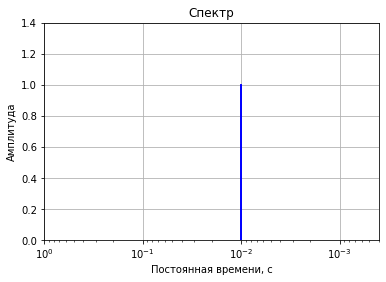

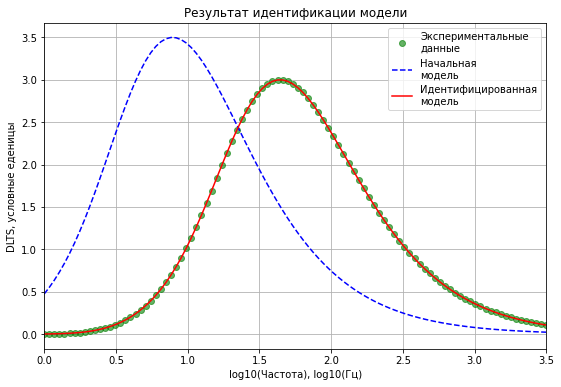

Спектр № 1
amplitude                2.9958
time_constant_power   -2.000003
p_coef                 0.997369
loss                        0.0
tc_0                   0.010798
tc_1                       0.01
tc_2                   0.009261
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 1, dtype: object
Значения степеней постоянных времени[-1.96666667 -2.         -2.03333333]
Значения амплитуды [1. 1. 1.]


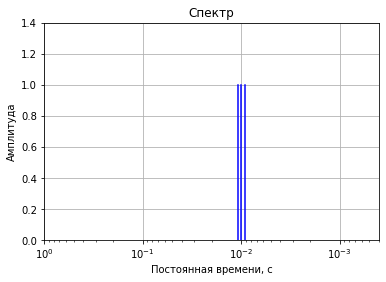

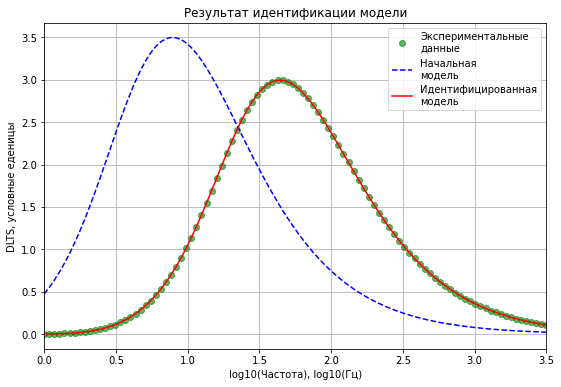

Спектр № 2
amplitude              2.983085
time_constant_power   -2.000008
p_coef                 0.989434
loss                   0.000007
tc_0                   0.011659
tc_1                       0.01
tc_2                   0.008577
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 2, dtype: object
Значения степеней постоянных времени[-1.93333333 -2.         -2.06666667]
Значения амплитуды [1. 1. 1.]


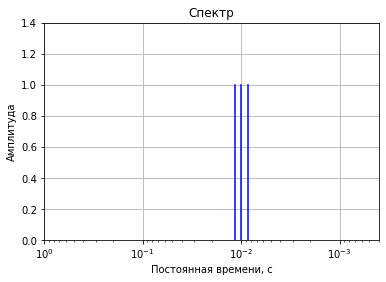

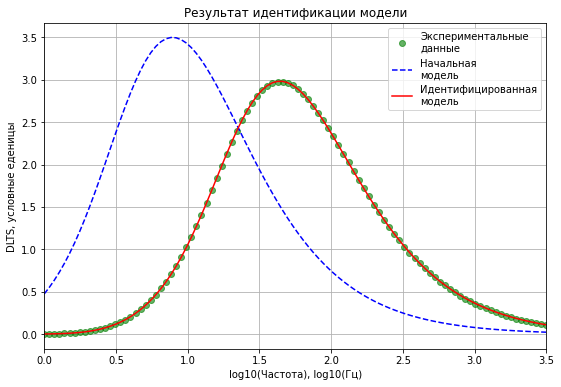

Спектр № 3
amplitude              2.962168
time_constant_power   -1.999999
p_coef                 0.976442
loss                   0.000037
tc_0                   0.012589
tc_1                       0.01
tc_2                   0.007943
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 3, dtype: object
Значения степеней постоянных времени[-1.9 -2.  -2.1]
Значения амплитуды [1. 1. 1.]


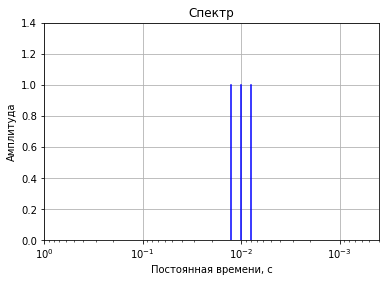

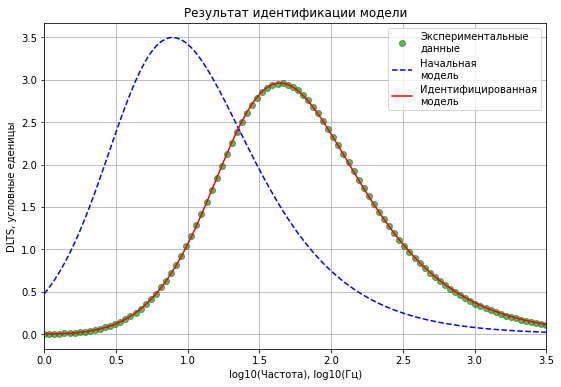

Спектр № 4
amplitude              2.933441
time_constant_power   -1.999953
p_coef                 0.958724
loss                   0.000114
tc_0                   0.013594
tc_1                       0.01
tc_2                   0.007356
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 4, dtype: object
Значения степеней постоянных времени[-1.86666667 -2.         -2.13333333]
Значения амплитуды [1. 1. 1.]


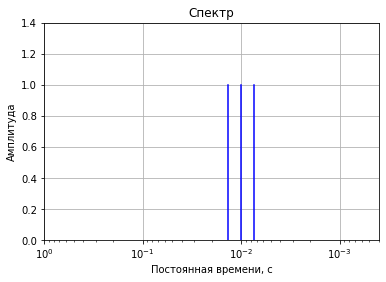

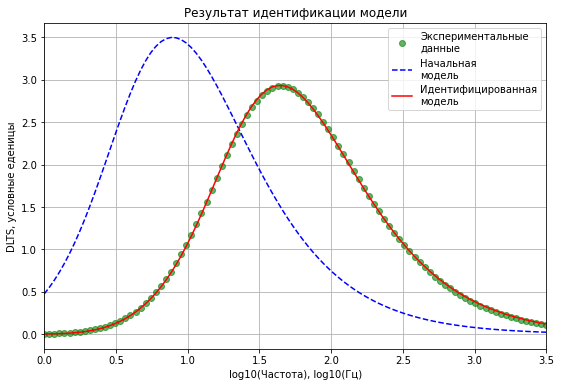

Спектр № 5
amplitude              2.897431
time_constant_power   -1.999837
p_coef                 0.936716
loss                   0.000269
tc_0                   0.014678
tc_1                       0.01
tc_2                   0.006813
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 5, dtype: object
Значения степеней постоянных времени[-1.83333333 -2.         -2.16666667]
Значения амплитуды [1. 1. 1.]


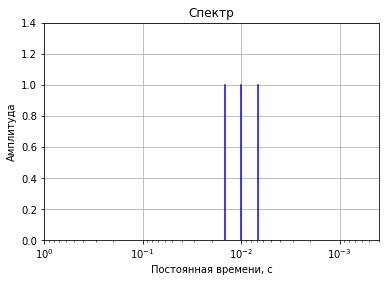

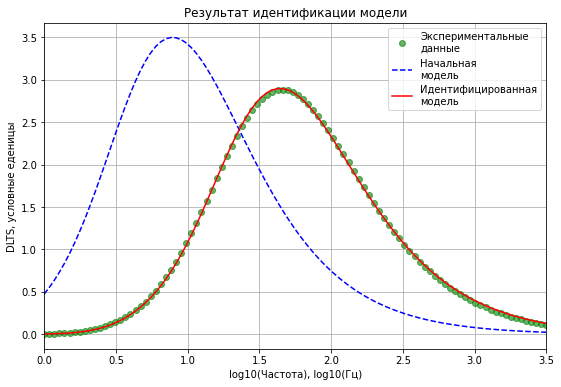

Спектр № 6
amplitude              2.854769
time_constant_power   -1.999611
p_coef                 0.910929
loss                   0.000535
tc_0                   0.015849
tc_1                       0.01
tc_2                    0.00631
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 6, dtype: object
Значения степеней постоянных времени[-1.8 -2.  -2.2]
Значения амплитуды [1. 1. 1.]


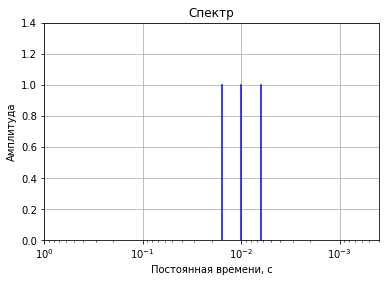

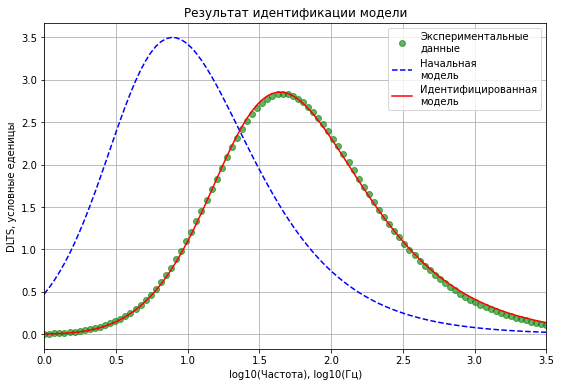

Спектр № 7
amplitude              2.806167
time_constant_power   -1.999227
p_coef                 0.881925
loss                   0.000943
tc_0                   0.017113
tc_1                       0.01
tc_2                   0.005843
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 7, dtype: object
Значения степеней постоянных времени[-1.76666667 -2.         -2.23333333]
Значения амплитуды [1. 1. 1.]


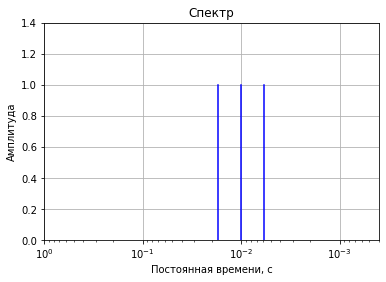

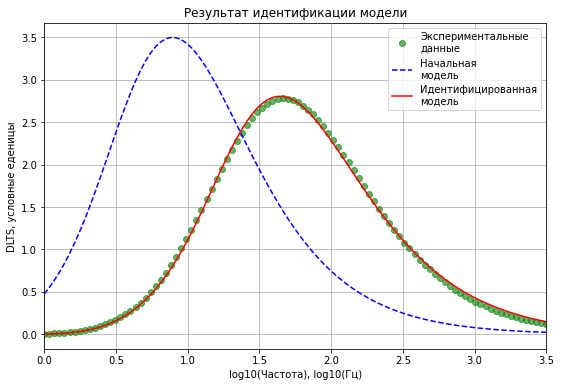

Спектр № 8
amplitude               2.75238
time_constant_power   -1.998632
p_coef                  0.85028
loss                   0.001521
tc_0                   0.018478
tc_1                       0.01
tc_2                   0.005412
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 8, dtype: object
Значения степеней постоянных времени[-1.73333333 -2.         -2.26666667]
Значения амплитуды [1. 1. 1.]


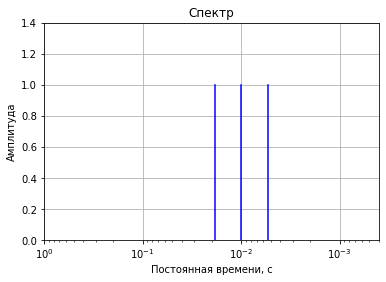

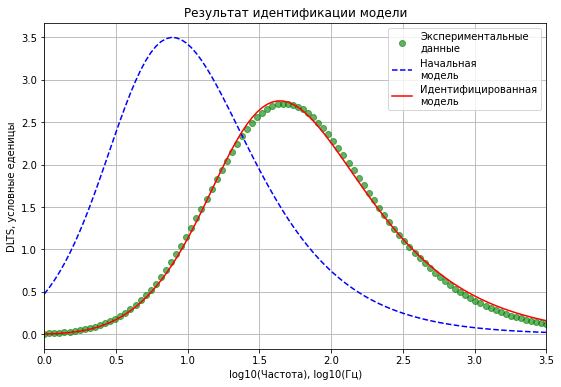

Спектр № 9
amplitude               2.69419
time_constant_power   -1.997773
p_coef                 0.816569
loss                   0.002287
tc_0                   0.019953
tc_1                       0.01
tc_2                   0.005012
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 9, dtype: object
Значения степеней постоянных времени[-1.7 -2.  -2.3]
Значения амплитуды [1. 1. 1.]


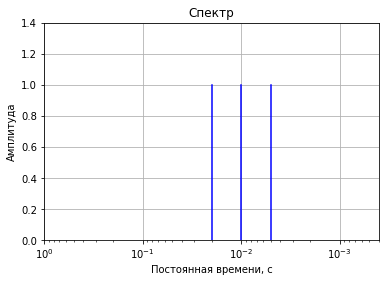

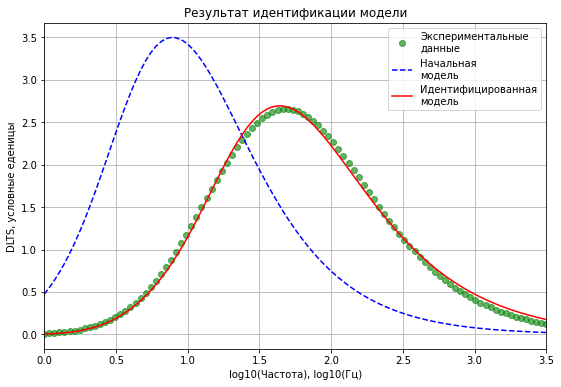

Спектр № 10
amplitude               2.63237
time_constant_power    -1.99659
p_coef                 0.781339
loss                   0.003251
tc_0                   0.021544
tc_1                       0.01
tc_2                   0.004642
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 10, dtype: object
Значения степеней постоянных времени[-1.66666667 -2.         -2.33333333]
Значения амплитуды [1. 1. 1.]


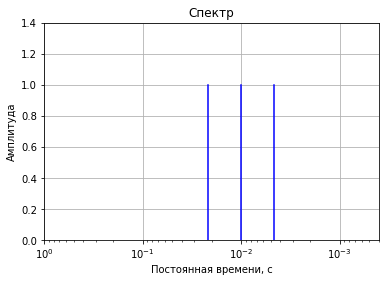

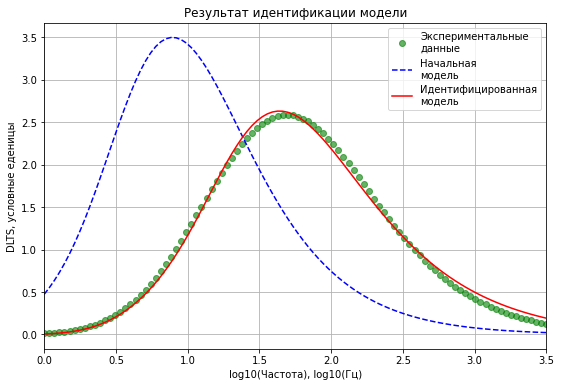

Спектр № 11
amplitude              2.567672
time_constant_power   -1.995028
p_coef                 0.745094
loss                   0.004408
tc_0                   0.023263
tc_1                       0.01
tc_2                   0.004299
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 11, dtype: object
Значения степеней постоянных времени[-1.63333333 -2.         -2.36666667]
Значения амплитуды [1. 1. 1.]


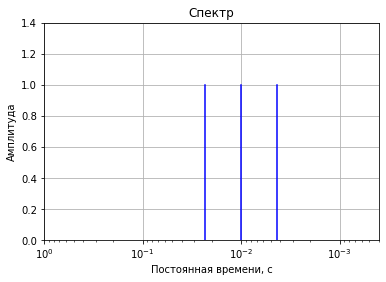

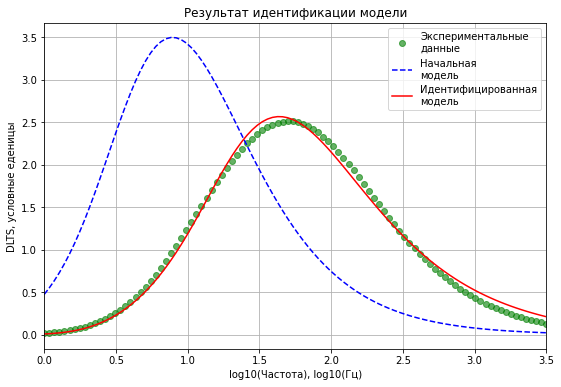

Спектр № 12
amplitude              2.500813
time_constant_power   -1.993032
p_coef                 0.708292
loss                   0.005745
tc_0                   0.025119
tc_1                       0.01
tc_2                   0.003981
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 12, dtype: object
Значения степеней постоянных времени[-1.6 -2.  -2.4]
Значения амплитуды [1. 1. 1.]


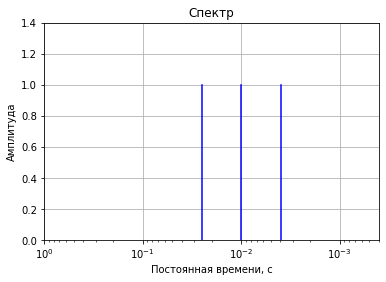

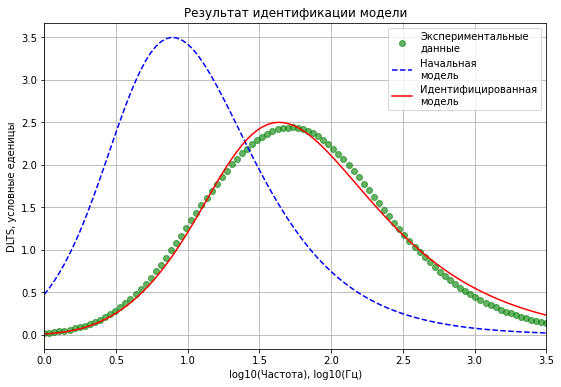

Спектр № 13
amplitude              2.432452
time_constant_power   -1.990555
p_coef                  0.67133
loss                   0.007235
tc_0                   0.027123
tc_1                       0.01
tc_2                   0.003687
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 13, dtype: object
Значения степеней постоянных времени[-1.56666667 -2.         -2.43333333]
Значения амплитуды [1. 1. 1.]


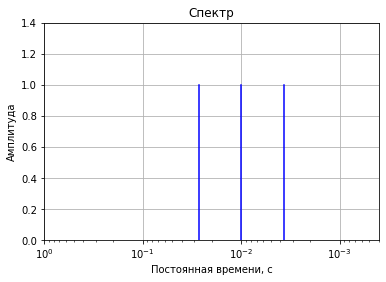

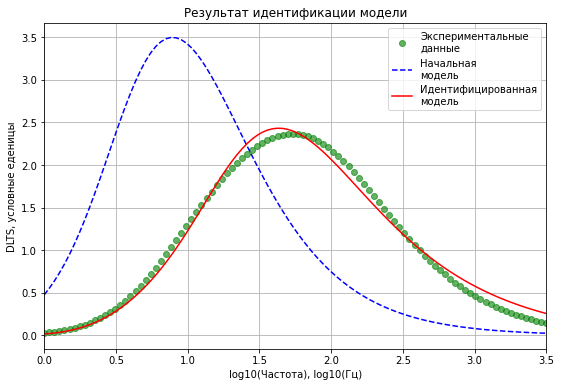

Спектр № 14
amplitude              2.363189
time_constant_power   -1.987557
p_coef                 0.634549
loss                   0.008842
tc_0                   0.029286
tc_1                       0.01
tc_2                   0.003415
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 14, dtype: object
Значения степеней постоянных времени[-1.53333333 -2.         -2.46666667]
Значения амплитуды [1. 1. 1.]


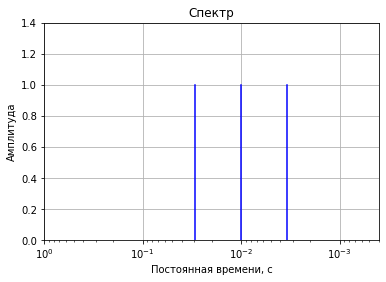

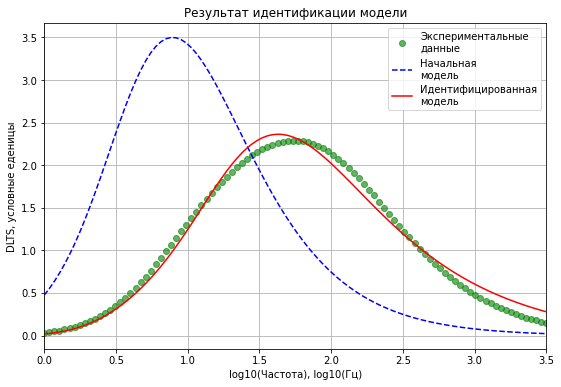

Спектр № 15
amplitude              2.293577
time_constant_power   -1.984009
p_coef                 0.598241
loss                   0.010522
tc_0                   0.031623
tc_1                       0.01
tc_2                   0.003162
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 15, dtype: object
Значения степеней постоянных времени[-1.5 -2.  -2.5]
Значения амплитуды [1. 1. 1.]


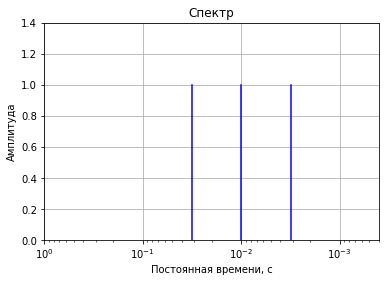

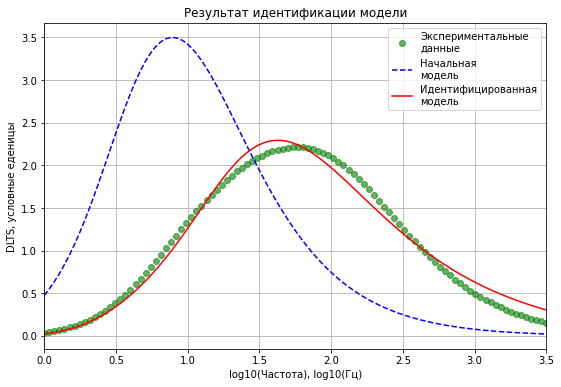

Спектр № 16
amplitude              2.224094
time_constant_power   -1.979899
p_coef                 0.562646
loss                   0.012227
tc_0                   0.034145
tc_1                       0.01
tc_2                   0.002929
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 16, dtype: object
Значения степеней постоянных времени[-1.46666667 -2.         -2.53333333]
Значения амплитуды [1. 1. 1.]


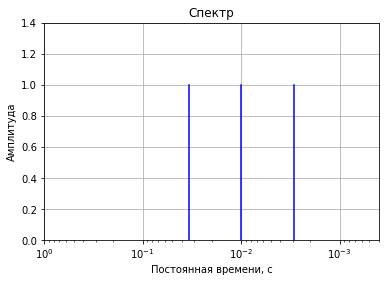

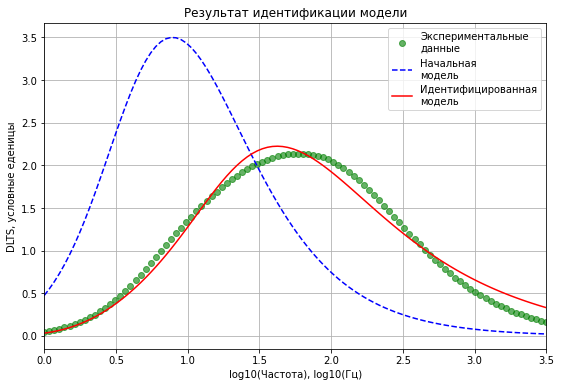

Спектр № 17
amplitude              2.155159
time_constant_power   -1.975229
p_coef                 0.527954
loss                   0.013904
tc_0                   0.036869
tc_1                       0.01
tc_2                   0.002712
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 17, dtype: object
Значения степеней постоянных времени[-1.43333333 -2.         -2.56666667]
Значения амплитуды [1. 1. 1.]


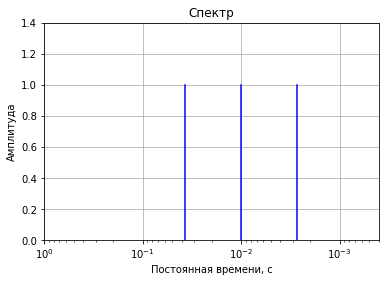

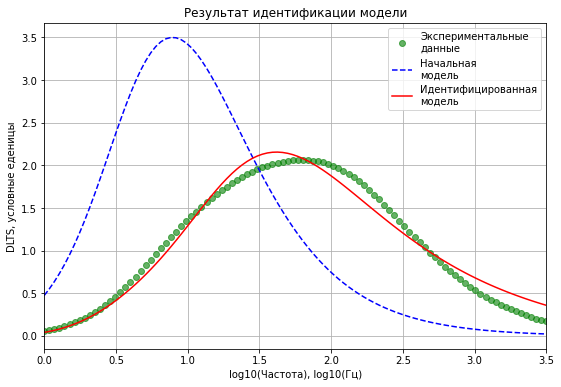

Спектр № 18
amplitude              2.087133
time_constant_power    -1.97002
p_coef                 0.494315
loss                   0.015505
tc_0                   0.039811
tc_1                       0.01
tc_2                   0.002512
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 18, dtype: object
Значения степеней постоянных времени[-1.4 -2.  -2.6]
Значения амплитуды [1. 1. 1.]


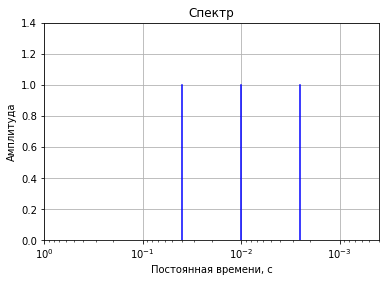

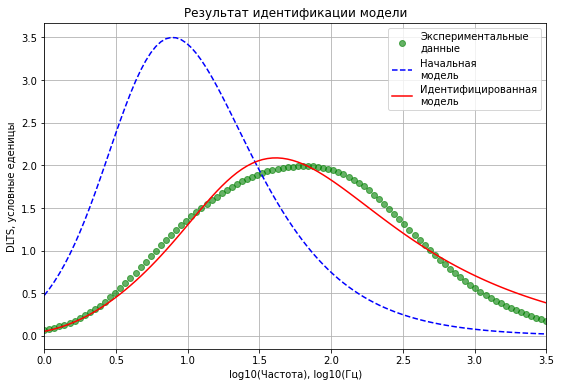

Спектр № 19
amplitude              2.020315
time_constant_power   -1.964313
p_coef                 0.461839
loss                   0.016982
tc_0                   0.042987
tc_1                       0.01
tc_2                   0.002326
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 19, dtype: object
Значения степеней постоянных времени[-1.36666667 -2.         -2.63333333]
Значения амплитуды [1. 1. 1.]


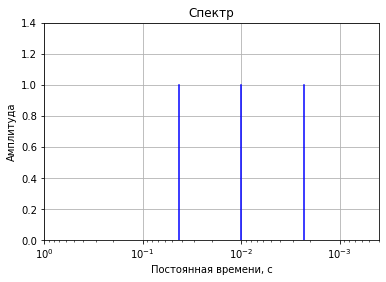

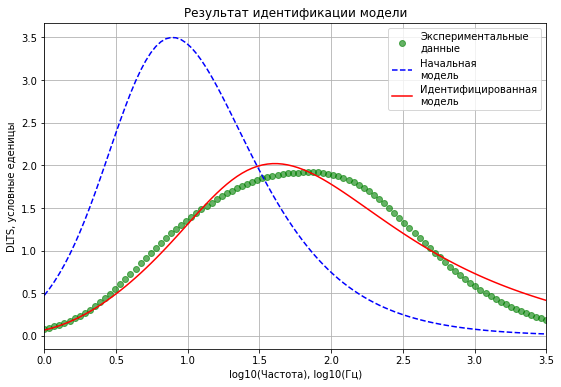

Спектр № 20
amplitude              1.954942
time_constant_power   -1.958164
p_coef                 0.430599
loss                   0.018296
tc_0                   0.046416
tc_1                       0.01
tc_2                   0.002154
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 20, dtype: object
Значения степеней постоянных времени[-1.33333333 -2.         -2.66666667]
Значения амплитуды [1. 1. 1.]


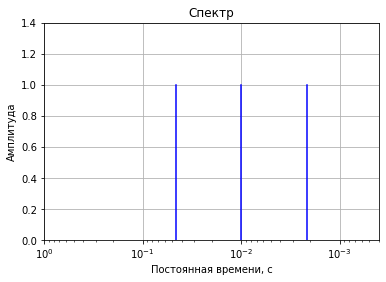

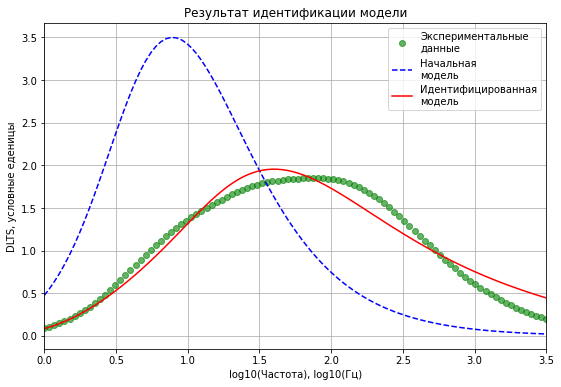

Спектр № 21
amplitude              1.891205
time_constant_power   -1.951643
p_coef                 0.400635
loss                   0.019415
tc_0                   0.050119
tc_1                       0.01
tc_2                   0.001995
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 21, dtype: object
Значения степеней постоянных времени[-1.3 -2.  -2.7]
Значения амплитуды [1. 1. 1.]


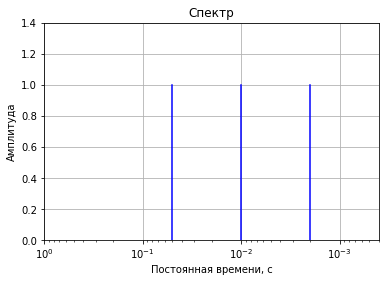

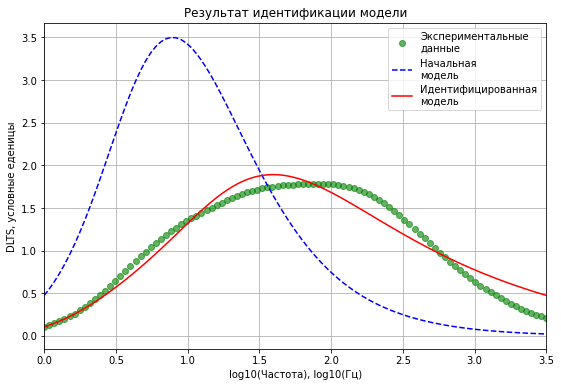

Спектр № 22
amplitude              1.829231
time_constant_power   -1.944829
p_coef                 0.371955
loss                   0.020314
tc_0                   0.054117
tc_1                       0.01
tc_2                   0.001848
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 22, dtype: object
Значения степеней постоянных времени[-1.26666667 -2.         -2.73333333]
Значения амплитуды [1. 1. 1.]


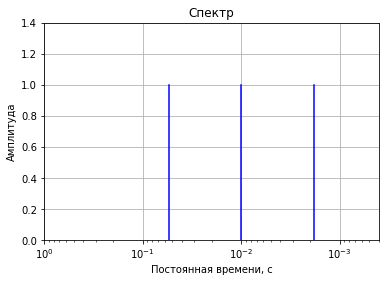

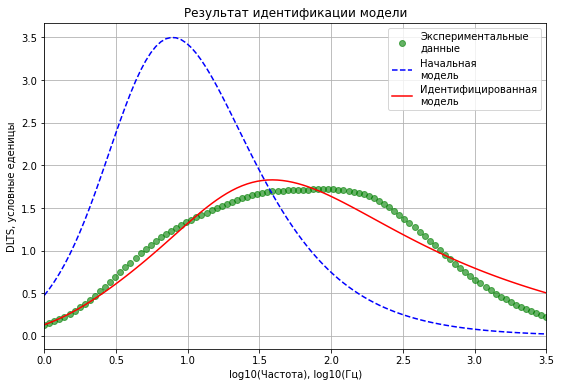

Спектр № 23
amplitude              1.769093
time_constant_power   -1.937805
p_coef                 0.344537
loss                   0.020979
tc_0                   0.058434
tc_1                       0.01
tc_2                   0.001711
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 23, dtype: object
Значения степеней постоянных времени[-1.23333333 -2.         -2.76666667]
Значения амплитуды [1. 1. 1.]


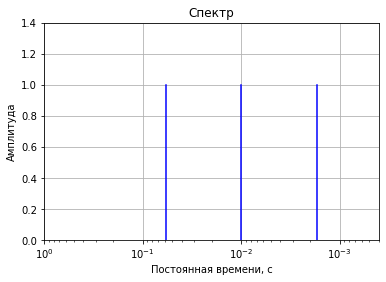

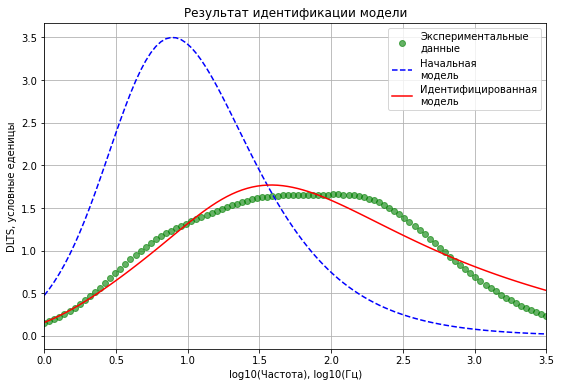

Спектр № 24
amplitude              1.710833
time_constant_power   -1.930657
p_coef                 0.318344
loss                   0.021404
tc_0                   0.063096
tc_1                       0.01
tc_2                   0.001585
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 24, dtype: object
Значения степеней постоянных времени[-1.2 -2.  -2.8]
Значения амплитуды [1. 1. 1.]


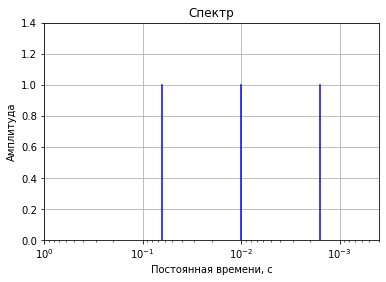

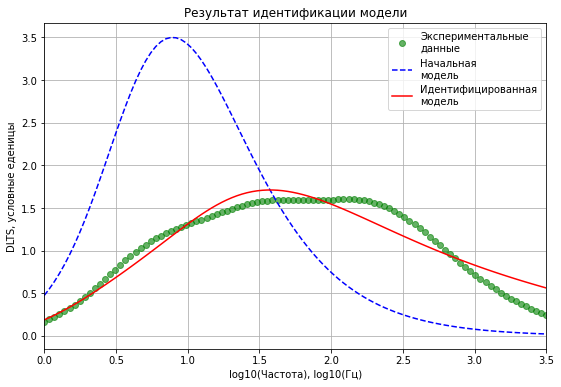

Спектр № 25
amplitude              1.654448
time_constant_power   -1.923467
p_coef                 0.293318
loss                   0.021592
tc_0                   0.068129
tc_1                       0.01
tc_2                   0.001468
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 25, dtype: object
Значения степеней постоянных времени[-1.16666667 -2.         -2.83333333]
Значения амплитуды [1. 1. 1.]


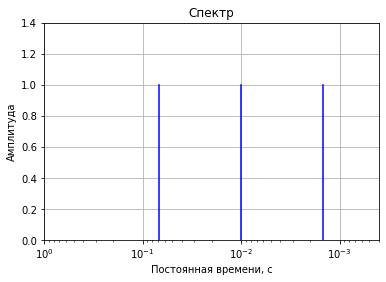

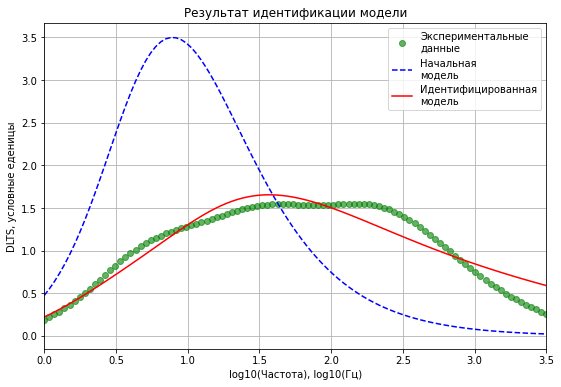

Спектр № 26
amplitude              1.599908
time_constant_power   -1.916315
p_coef                 0.269394
loss                   0.021553
tc_0                   0.073564
tc_1                       0.01
tc_2                   0.001359
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 26, dtype: object
Значения степеней постоянных времени[-1.13333333 -2.         -2.86666667]
Значения амплитуды [1. 1. 1.]


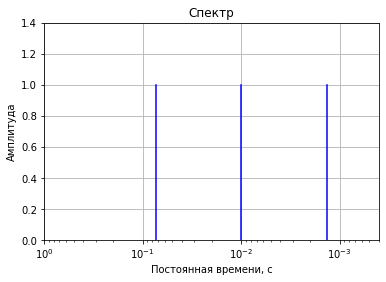

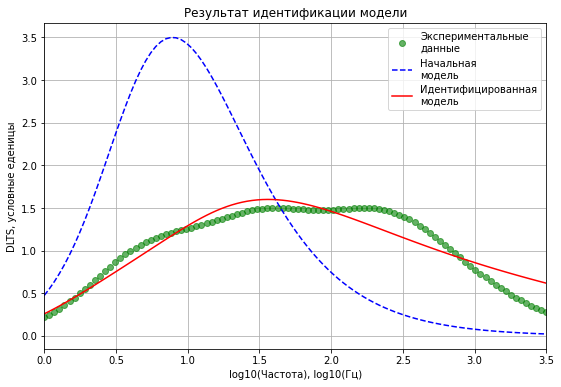

Спектр № 27
amplitude               1.54716
time_constant_power   -1.909279
p_coef                 0.246501
loss                   0.021303
tc_0                   0.079433
tc_1                       0.01
tc_2                   0.001259
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 27, dtype: object
Значения степеней постоянных времени[-1.1 -2.  -2.9]
Значения амплитуды [1. 1. 1.]


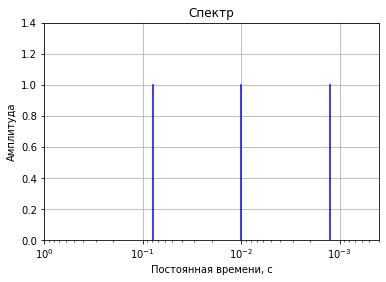

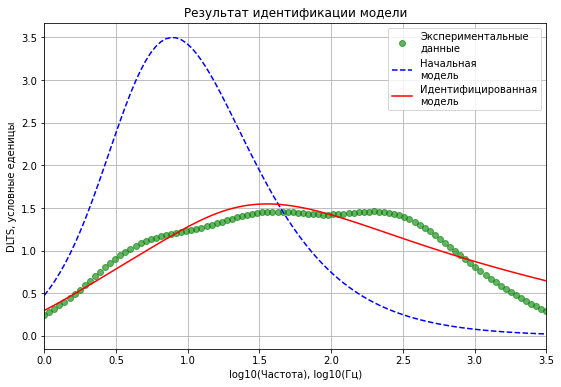

Спектр № 28
amplitude              1.496146
time_constant_power   -1.902438
p_coef                 0.224571
loss                   0.020866
tc_0                    0.08577
tc_1                       0.01
tc_2                   0.001166
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 28, dtype: object
Значения степеней постоянных времени[-1.06666667 -2.         -2.93333333]
Значения амплитуды [1. 1. 1.]


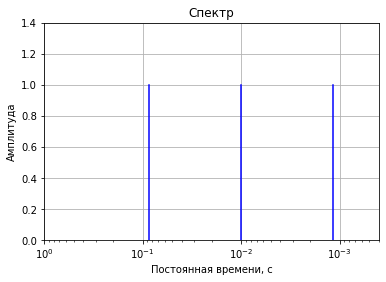

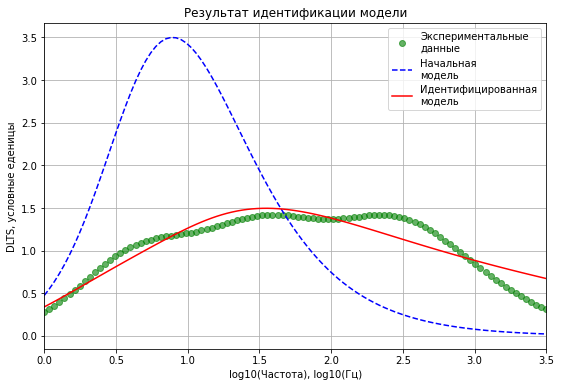

Спектр № 29
amplitude              1.446791
time_constant_power   -1.895878
p_coef                 0.203536
loss                   0.020268
tc_0                   0.092612
tc_1                       0.01
tc_2                    0.00108
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 29, dtype: object
Значения степеней постоянных времени[-1.03333333 -2.         -2.96666667]
Значения амплитуды [1. 1. 1.]


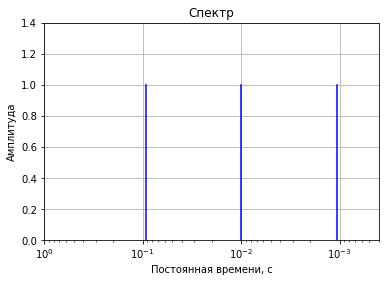

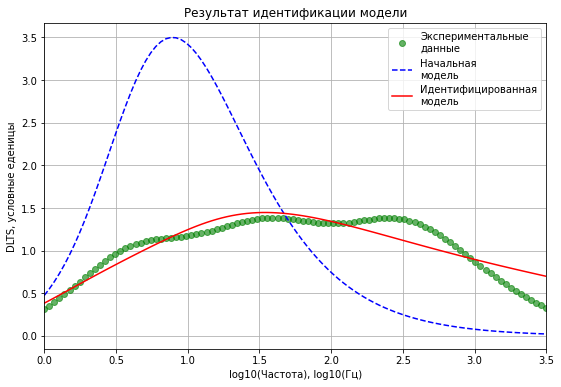

Спектр № 30
amplitude              1.399025
time_constant_power   -1.889708
p_coef                 0.183337
loss                    0.01954
tc_0                        0.1
tc_1                       0.01
tc_2                      0.001
amp_0                       1.0
amp_1                       1.0
amp_2                       1.0
Name: 30, dtype: object
Значения степеней постоянных времени[-1. -2. -3.]
Значения амплитуды [1. 1. 1.]


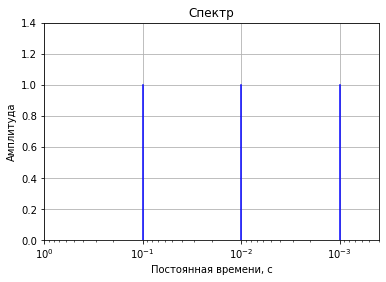

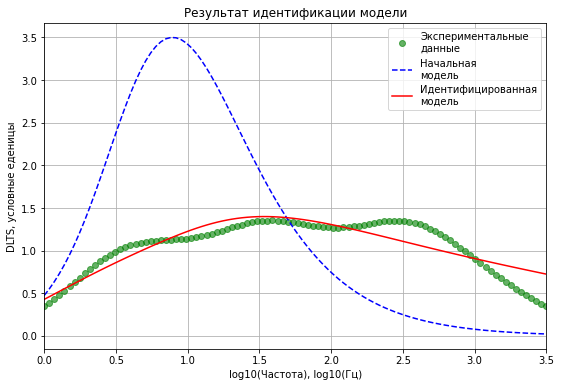

In [8]:
fs = FrequencyScan(time_constant_power=-1.25,)

initial_dlts = fs(frequency_powers)

plot_group_of_models(frequency_powers,
                     time_constant_powers,
                     amplitudes,
                     initial_dlts, 
                     results,
                     save_to = '../plots/3-exp-clear/'
                    )

## Зависимость $p$ от расстояния между линиями на спектре

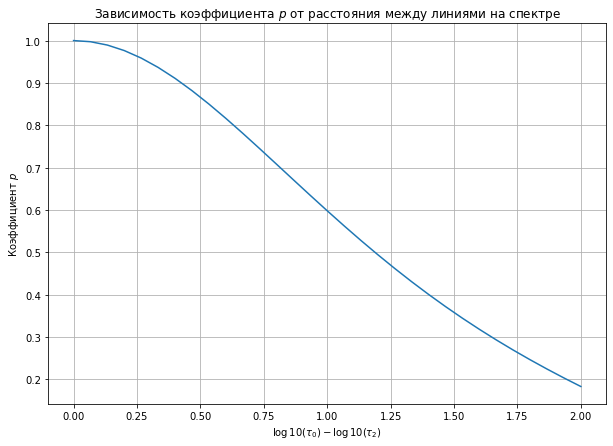

In [9]:
plt.figure(figsize=(10,7))

max_dev = time_constant_powers[:, 0] - time_constant_powers[:, 2]
plt.plot(max_dev, results.p_coef)
plt.title('Зависимость коэффициента $p$ от расстояния между линиями на спектре')
plt.xlabel(r'$\log10(\tau_0) - \log10(\tau_2)$')
plt.ylabel('Коэффициент $p$')
plt.grid()

plt.savefig('../plots/3-exp-clear/plot_p_func.pdf', bbox_inches='tight')
plt.savefig('../plots/3-exp-clear/plot_p_func.jpg', bbox_inches='tight')   

plt.show()

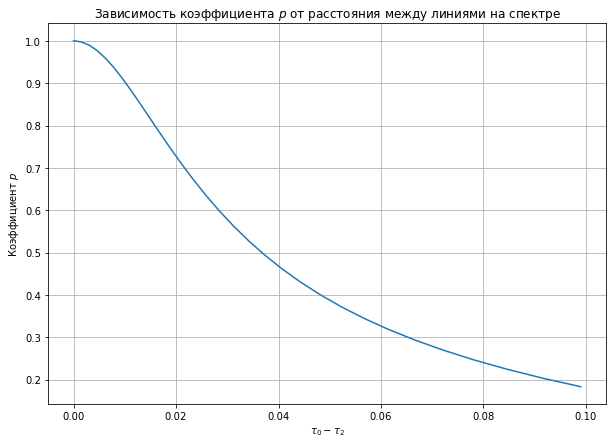

In [10]:
plt.figure(figsize=(10,7))

max_dev = 10 ** time_constant_powers[:, 0] - 10 ** time_constant_powers[:, 2]
plt.plot(max_dev, results.p_coef)
plt.title('Зависимость коэффициента $p$ от расстояния между линиями на спектре')
plt.xlabel(r'$\tau_0 - \tau_2$')
plt.ylabel('Коэффициент $p$')
plt.grid()

plt.savefig('../plots/3-exp-clear/semilogx_p_func.pdf', bbox_inches='tight')
plt.savefig('../plots/3-exp-clear/semilogx_p_func.jpg', bbox_inches='tight')  

plt.show()